# Introduction

This notebook will take you through some of the foundational elements of the Time Series analysis, Including various types of dataset's and how does Time Series Data differ from them, Inferrential Statistics pertaining to the Time Series data, Various graphical visualisation involved in the time series.

<b>Interesting Read : </b>[Engineering Statistics Handbook](https://www.itl.nist.gov/div898/handbook/index.htm)

<img src='../Materials/Engineering Statistic Handbook - Cover.png' width='250' align='left'>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

[R - Libraries : Some useful libraries and components for Time Series Analysis in R - by Rob.J.Hyndman](https://cran.r-project.org/web/views/TimeSeries.html)

# Imports

In [1]:
# General
from warnings import filterwarnings
filterwarnings('ignore')
from cycler import cycler


# Data Wrangling
import pandas as pd
import numpy as np

# Data Viualization
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpl

# Time Series Specific
from statsmodels.tsa.seasonal import seasonal_decompose


# Datetime
from datetime import datetime

# Data
from helperhandler import dataHolder

# Path and Variable Initialisation

In [2]:
root_path = '../'
raw_datapath = root_path+'Raw Data/'
prepared_datapath = root_path+'Prepared Data/'

In [3]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (15,7)
plt.style.use('dark_background')

# Load & Explore the Data

In [11]:
dataHolder.load_data()

In [12]:
print('Available Datasets')
dataHolder.dataDf

Available Datasets


,Handle,Short Description
0,airp_data,Air Passengers
1,mprod_data,Milk Production
2,brit_stock,Britannia Stock Price
3,india_cpi,India CPI
4,beer_prod,Beer Production
5,house_price,Housing Prices
6,airp_data_missing,Air Passengers - Missing
7,housing_missing,Housing Data - Missing
8,pop_ener,Population & Energy
9,usa_cpi,USA-CPI


## Air Passengers Data

In [13]:
k='airp_data'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

Air Passengers (Monthly), Numbers in 1000's, from 1949 to 1960


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


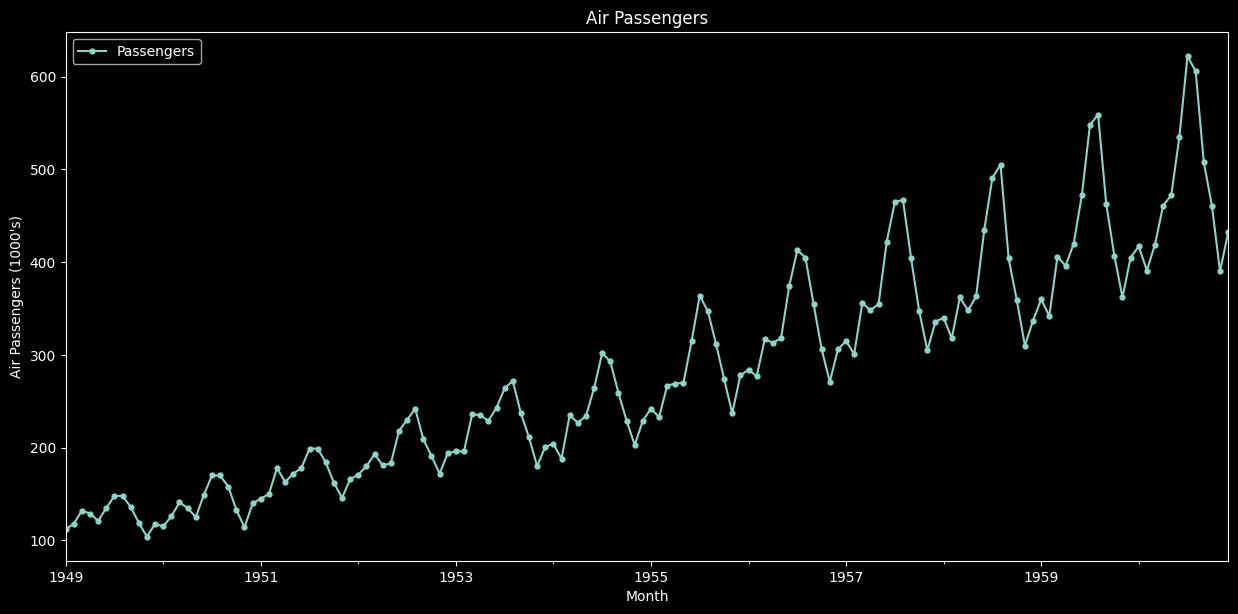

In [7]:
dataHolder.bucket[k].exploratory_plot()

## Milk Production Data

In [ ]:
k='mprod_data'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

In [ ]:
dataHolder.bucket[k].exploratory_plot()

## Britannia Stock Price Data

In [ ]:
k='brit_stock'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

In [ ]:
dataHolder.bucket[k].exploratory_plot()

## India CPI Data

In [ ]:
k='india_cpi'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

In [ ]:
dataHolder.bucket[k].exploratory_plot()

## Beer Production Data

In [ ]:
k='beer_prod'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

In [ ]:
dataHolder.bucket[k].exploratory_plot()

## Housing Prices Data

In [ ]:
k='house_price'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

In [ ]:
dataHolder.bucket[k].exploratory_plot()

## Air Passengers Missing Data

In [ ]:
k='airp_data_missing'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

In [ ]:
dataHolder.bucket[k].exploratory_plot()

## Housing Missing Data

In [ ]:
k='housing_missing'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

In [ ]:
dataHolder.bucket[k].exploratory_plot()

## Global Population & Energy Data

In [ ]:
k='pop_ener'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

In [ ]:
dataHolder.bucket[k].exploratory_plot()

## USA Consumer Price Index Data

In [ ]:
k='usa_cpi'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

In [ ]:
dataHolder.bucket[k].exploratory_plot()

## Anti-Diabetic Drug Sales Data

In [ ]:
k='anti_diabetic'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

In [ ]:
dataHolder.bucket[k].exploratory_plot()

## Australlia Electricity Production

In [ ]:
k='aus_elecprod'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

In [ ]:
dataHolder.bucket[k].exploratory_plot()

## Visitors 20 Regions

In [ ]:
k='visitor_20r'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

In [ ]:
dataHolder.bucket[k].exploratory_plot()

# Different Types of Data

 - Time Series Data : Data collected against a ***Single feature*** across an equally spaced time span.
 
 - Cross-Sectional Data : Data collected against ***Multiple features*** at a single point in time.
 
 - Panel Data : Recording data for ***Multiple features at eaqually spaced time intervals***

In [ ]:
cpi_data = dataHolder.bucket['india_cpi'].data.copy()
cpi_data.head()

<b>Time Series Data</b>

Notice the `Object` for data recording here is `State`, and the remainder are features.

Q) Can you tell what are the features of this dataset then?

In [ ]:
tsdata = cpi_data[cpi_data.State.isin(['Delhi'])].copy()
tsdata = tsdata[:10].reset_index().drop('index', axis=1)
tsdata = tsdata.style.set_caption('Time Series Data') # Giving your data frame a title
tsdata

<b>Cross Sectional Data</b>

Notice the `Object` for data recording here is `State->Description`, and the remainder are features.


In [ ]:
csdata = cpi_data[cpi_data.Date.isin(['2013-01-01'])].copy()
csdata = csdata[csdata.State.isin(['Delhi'])][:10]
csdata = csdata[:10].reset_index().drop('index', axis=1)
csdata = csdata.style.set_caption('Cross Sectional Data') # Giving your data frame a title
csdata

<b>Panel Data</b>

Notice the `Object` for data recording here is `State->Description`, and the remainder are features.



In [ ]:
csdata = cpi_data[cpi_data.Date.isin(['2013-01-01', '2013-02-01'])].copy()
csdata = csdata[csdata.State.isin(['Delhi'])][:10]
csdata = csdata[:10].reset_index().drop('index', axis=1)
csdata = csdata.style.set_caption('Panel Data') # Giving your data frame a title
csdata

# Time Series Related Operations

 - Windows
 - Lags
 - Resampling
 - Differencing
 - Percentage Change
 - Imputation
 - Outlier Detection - #TODO


## Windows

- <b>Rolling Window</b> : Shifting a specified width window over the dataset.

- <b>Expanding Window</b> : Dynamic sized window that changes its window length in tandem with the dates, keeping the data from begining to the latest date, chronologically, in the window


<b>Rolling Window</b>

In [ ]:
rolling_data = dataHolder.bucket['airp_data'].data.copy()

In [ ]:
rolling_data['Passengers_r5mean'] = rolling_data.Passengers.rolling(5).mean()
rolling_data['Passengers_r10mean'] = rolling_data.Passengers.rolling(10).mean()
rolling_data[:50].plot(marker='o', markersize=3)

<b>Rolling Window</b> - Window Type

[scipy - Different Window Types](https://docs.scipy.org/doc/scipy/reference/signal.windows.html#module-scipy.signal.windows)

<img src='https://docs.scipy.org/doc/scipy/reference/_images/scipy-signal-windows-exponential-1_00.png' width='250' align='left'>

<img src='https://docs.scipy.org/doc/scipy/reference/_images/scipy-signal-windows-triang-1_00.png' width='250' align='left'>

<img src='https://docs.scipy.org/doc/scipy/reference/_images/scipy-signal-windows-gaussian-1_00.png' width='250' align='left'>



In [ ]:
rolling_data = dataHolder.bucket['airp_data'].data.copy()

In [ ]:
rolling_data['Passengers_rE5mean'] = rolling_data.Passengers.rolling(5, win_type='exponential').mean(tau=3)
rolling_data['Passengers_rG5mean'] = rolling_data.Passengers.rolling(5, win_type='gaussian').mean(std=1)
rolling_data['Passengers_rT5mean'] = rolling_data.Passengers.rolling(10, win_type='triang').mean()
_=rolling_data[:50].plot(marker='o', markersize=3, title='Different Window Types')

In [ ]:
_=rolling_data.plot(marker='o', markersize=3, title='Different Window Types')

<b>Expanding Window</b>

In [ ]:
expanding_data = dataHolder.bucket['airp_data'].data.copy()

Will there be any difference between the different windows for expanding windows?

In [ ]:
expanding_data['Passengers_e5mean'] = expanding_data.Passengers.expanding(5).mean()
expanding_data['Passengers_e10mean'] = expanding_data.Passengers.expanding(10).mean()
_=expanding_data.plot(marker='o', markersize=3, title='Different Windows')

Take a moment and think when is it that you will use Expanding Window and Rolling Window?
- Example Maximum DD uptil now, in a Trading Strategy.

## Lags

Since the time series data is collected over a period of time, datapoints adjacent of `Timestamps` might have relation with one another, hence it becomes appropriate to consider the `Lagged` values of time series in your analysis

In [ ]:
lagdata = dataHolder.bucket['beer_prod'].data.copy()
lagdata.columns = ['MBP_L0']
lagdata['MBP_L1']  = lagdata.MBP_L0.shift(1)
# lagdata['MBP_L6']  = lagdata.MBP_L0.shift(6)
# lagdata['MBP_L12'] = lagdata.MBP_L0.shift(12)
# lagdata['MBP_L24'] = lagdata.MBP_L0.shift(24)
_=lagdata.dropna()[:50].plot(title='Monthly Beer Production & its Lags')

## Resampling
Changing frequency of the time series dataset, and applying aggregation functions over them

In [ ]:
britanniastock_data=dataHolder.bucket['brit_stock'].data.copy()

In [ ]:
resampled_data = britanniastock_data.resample('2M').agg({'Open':'first',
                                                          'High':'max',
                                                          'Low':'min',
                                                          'Close':'last',
                                                          'Volume':'sum'})
mpl.plot(britanniastock_data, figsize=(15,7),
         type='candle', volume=True, style='mike')

In [ ]:
resampled_data = britanniastock_data.resample('12W', label='right').agg({'Open':'first',
                                                                        'High':'max',
                                                                        'Low':'min',
                                                                        'Close':'last',
                                                                        'Volume':'sum'})
mpl.plot(resampled_data, figsize=(15,7),
         type='candle', volume=True, style='mike')

In [ ]:
britanniastock_data.resample('2W', label='right').agg({'Open':'first',
                                                          'High':'max',
                                                          'Low':'min',
                                                          'Close':'last',
                                                          'Volume':'sum'})

## Differencing & Percentage Change

 - Differencing : Taking a <b>difference of the value at $t_{i}$ with $t_{i-n}$</b>, where n is the period
 - Percentage Change : <b>Change observed in the value at $t_{i}$ w.r.t $t_{i-n}$</b>, where n is the period


In [ ]:
houseprices_data = dataHolder.bucket['house_price'].data.copy()

In [ ]:
chicago_prices = houseprices_data[houseprices_data.Region=='Chicago'].copy()
chicago_prices.drop(['Region'], axis=1, inplace=True)
chicago_prices['Price_diffP1'] = chicago_prices.Price.diff(1)
chicago_prices['Price_diffP2'] = chicago_prices.Price.diff(2)

chicago_prices['Price_pctP1'] = chicago_prices.Price.pct_change(1)
chicago_prices['Price_pctP2'] = chicago_prices.Price.pct_change(2)
chicago_prices = chicago_prices.dropna()
chicago_prices.head()

In [ ]:
fig,axes = plt.subplots(3,1,figsize=(15,12))
_=axes[0].plot(chicago_prices.Price, marker='o', markersize=3, label='Actual Price')
_=axes[0].legend()
_=axes[0].set_title('Actual Price of the Houses')

_=axes[1].plot(chicago_prices.Price_diffP1, marker='o', markersize=3, label='DiffP1')
_=axes[1].plot(chicago_prices.Price_diffP2, marker='o', markersize=3, label='DiffP2')
_=axes[1].legend()
_=axes[1].set_title('Actual Price Differencing')

_=axes[2].plot(chicago_prices.Price_pctP1, marker='o', markersize=3, label='PctP1')
_=axes[2].plot(chicago_prices.Price_pctP2, marker='o', markersize=3, label='PctP2')
_=axes[2].legend()
_=axes[2].set_title('Actual Price Percent Change')

_=fig.suptitle('Differencing \n&\n Percent Change', fontsize=20)


## Imputation

Simply put, Filling in the Missing Values.

- fillna - Static Value Imputation
- bfill - Backward Fill
- ffill - Forward Fill
- interpolate - `spline`, `polynomial`, `linear`, `quadratic`, `barycentric`, `pchip`, `akima`, 
- rfimpute - Random Forest Imputation
- kNN - K Nearest Neighbours
- PoP Imputation - Period Over Period Imputation

NOTE : Be wary while usgin `polynomial` interpolation as it can induce ocsillations in the dataset, a phenomenon known as [Runge's phenomenon](https://en.wikipedia.org/wiki/Runge%27s_phenomenon)

<b>Interesting Read</b> : [Working with Missing Data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#filling-with-a-pandasobject)


<b>Filling a Static Value for the NaN columns</b>

In [ ]:
def get_uv_impplot(data, title):
    data=data.reset_index().copy()
    fig, axes = plt.subplots()
    from matplotlib.cm import get_cmap
    name = "Pastel1"
    cmap = get_cmap(name)
    colors = cmap.colors
    axes.set_prop_cycle(color=colors)
    for ecol in [k for k in data.columns if 'Imputed' in k]:
        sns.lineplot(x='Date', y=ecol, data=data, label=ecol,
                     linestyle='-.', marker='o', markersize=3, ax=axes)
    sns.lineplot(x='Date', y='Actual', data=data, label='Actual',
                 color='b', linestyle='-.', marker='o', markersize=3, ax=axes)
    axes.set_title(title)
    plt.close()
    return fig

In [ ]:
fillna_imputeUV = dataHolder.bucket['airp_data_missing'].data.copy()
fillna_imputeUV.columns=['Actual']
fillna_imputeUV['Imputed'] = fillna_imputeUV.fillna(fillna_imputeUV.Actual.mean())

get_uv_impplot(fillna_imputeUV, title='Univaritate - Mean Imputation')

In [ ]:
fillna_imputeUV = dataHolder.bucket['airp_data_missing'].data.copy()
fillna_imputeUV.columns=['Actual']
fillna_imputeUV['Imputed'] = fillna_imputeUV.fillna(fillna_imputeUV.Actual.median())

get_uv_impplot(fillna_imputeUV, title='Univaritate - Median Imputation')

In [ ]:
fillna_imputeUV = dataHolder.bucket['airp_data_missing'].data.copy()
fillna_imputeUV.columns=['Actual']

fillna_imputeUV['Imputed'] = fillna_imputeUV.Actual.fillna(0).rolling(window=10).mean()
fillna_imputeUV['Imputed'] = fillna_imputeUV.apply(lambda x : \
                                                   x.Imputed if pd.isna(x.Actual) else x.Actual, axis=1)

get_uv_impplot(fillna_imputeUV, title='Univaritate - Rolling Window Mean Imputation')

<b>Forward and Backward Fill</b>

In [ ]:
ffill_imputeUV = dataHolder.bucket['airp_data_missing'].data.copy()
ffill_imputeUV.columns=['Actual']
ffill_imputeUV['Imputed'] = ffill_imputeUV.Actual.ffill()

get_uv_impplot(ffill_imputeUV, title='Univaritate - Forward Fill')

In [ ]:
bfill_imputeUV = dataHolder.bucket['airp_data_missing'].data.copy()
bfill_imputeUV.columns=['Actual']
bfill_imputeUV['Imputed'] = bfill_imputeUV.Actual.bfill()

get_uv_impplot(bfill_imputeUV, title='Univaritate - Backward Fill')

<b>Interpolation</b>

In [ ]:
interp_imputeUV = dataHolder.bucket['airp_data_missing'].data.copy()
interp_imputeUV.columns=['Actual']
interp_imputeUV['Imputed_Linear'] = interp_imputeUV.Actual.interpolate(method='linear')
interp_imputeUV['Imputed_Quadratic'] = interp_imputeUV.Actual.interpolate(method='quadratic')
interp_imputeUV['Imputed_Spline'] = interp_imputeUV.Actual.interpolate(method='spline', order=2)
interp_imputeUV['Imputed_Poly'] = interp_imputeUV.Actual.interpolate(method='polynomial', order=2)
interp_imputeUV['Imputed_Pchip'] = interp_imputeUV.Actual.interpolate(method='pchip')

get_uv_impplot(interp_imputeUV[90:], title='Univaritate - Interpolation')

<b>Now, lets calculate which method of interpolation is the best for the given dataset?</b>

In [ ]:
imp_check = dataHolder.bucket['airp_data_missing'].data.copy()
imp_check.columns=['Actual']
imp_check['Imputed_Linear'] = imp_check.Actual.interpolate(method='linear')
imp_check['Imputed_Quadratic'] = imp_check.Actual.interpolate(method='quadratic')
imp_check['Imputed_Spline'] = imp_check.Actual.interpolate(method='spline', order=2)
imp_check['Imputed_Poly'] = imp_check.Actual.interpolate(method='polynomial', order=2)
imp_check['Imputed_Pchip'] = imp_check.Actual.interpolate(method='pchip')
imp_check['Imputed_bfill'] = imp_check.Actual.bfill()
imp_check['Imputed_ffill'] = imp_check.Actual.ffill()

imp_check['Imputed_Rolling'] = imp_check.Actual.fillna(0).rolling(window=10).mean()
imp_check['Imputed_Rolling'] = imp_check.apply(lambda x : x.Imputed_Rolling if pd.isna(x.Actual) else x.Actual,
                                               axis=1)
imp_check['Imputed_Meanfill'] = imp_check.Actual.fillna(imp_check.Actual.mean())
imp_check['Imputed_Medialfill'] = imp_check.Actual.fillna(imp_check.Actual.median())
imp_check.head()


In [ ]:
sse_df = pd.DataFrame(columns=['SSE'])
actual_data = dataHolder.bucket['airp_data'].data.copy()
sse_df.index.name = 'Imputation Type'
for ecol in [k for k in imp_check.columns if 'Imputed' in k]:
    imputation_name = " ".join(ecol.split('_'))
    score = ((imp_check[ecol]-actual_data['Passengers'])**2).sum()
    sse_df.loc[imputation_name, 'SSE'] = score


In [ ]:
sse_df

<b>But do you think this is the right way to assess which `Interpolation` method to use?</b>

Ans) No!, we wont have the actual data to compare it with, Which Interpolation method to use is something that is very specific to the `Domain Knowledge` of the Time Series problem we are working on.

<b>Imputing missing data in Multivariate Dataset</b>

- Random Forest Imputation using Proximity Matrix, **Interesting Course :** [Intro To Machine Learning by Jeremy Howards & Rachel](https://course18.fast.ai/ml.html)
- KNN Imputation : **Interesting Read :** [sklearn docs](https://scikit-learn.org/stable/modules/impute.html#nearest-neighbors-imputation)

In [ ]:
housepmiss_data = dataHolder.bucket['housing_missing'].data.copy()

In [ ]:
from missingpy import MissForest, KNNImputer
imputer = MissForest()
X_imputed = imputer.fit_transform(housepmiss_data.values)
X_imputed_DF = pd.DataFrame(X_imputed, columns=housepmiss_data.columns)

In [ ]:
import numpy as np
from sklearn.impute import KNNImputer
nan = np.nan
imputer = KNNImputer(n_neighbors=2, weights="uniform")
X_imputed = imputer.fit_transform(housepmiss_data.values)
X_imputed_DF = pd.DataFrame(X_imputed, columns=housepmiss_data.columns)
X_imputed_DF

## Smoothing Operations

 - Moving Average
 - Exponential Smoothing
 - Holt Winter Exponential Smoothing
 - Fourier Smoothing

In [ ]:
smoothing_data = dataHolder.bucket['beer_prod'].data.copy()
smoothing_data.columns = ['MBP']
smoothing_data['SmoothedData'] = np.nan
smoothing_data.head()

<b>Moving Average Smoothing</b>

In [ ]:
window_size = 10
smoothing_data['SmoothedData'] = smoothing_data.MBP.rolling(window=window_size).mean()

_=smoothing_data.plot(title=f'Monthly Beer Production with $window$ = {window_size}', 
                       linestyle='-', marker='o', markersize=3)

<b>Exponential Smoothing</b>

In [ ]:
# Custom Definition of weights
window_size = 15
win_weights = np.diff(np.geomspace(1,2, window_size+1)-1)
def get_exp(x):
    global win_weights
    return sum(x.values*win_weights)

rolling = smoothing_data.MBP.rolling(window=window_size)
smoothing_data['SmoothedData'] = rolling.apply(lambda x : get_exp(x))

_=smoothing_data.plot(title=f'Monthly Beer Production & Average Smoothing with $window$ = {window_size}', 
                       linestyle='-',)

In [ ]:
# pandas ewm
window_size = 10
smoothing_data['SmoothedData'] = smoothing_data.MBP.rolling(window=window_size).mean()

_=smoothing_data.plot(title=f'Monthly Beer Production & Exponential Smoothing with $window$ = {window_size}', 
                       linestyle='-')

<b>Fourier Smoothing</b>

In [ ]:
# Inspired from : https://dsp.stackexchange.com/a/49233/47462

y = smoothing_data.MBP.values
n = len(y)
x = np.linspace(start=0, stop=n-1, num=n)

fig, axes  = plt.subplots(3,1, figsize=(25,35))

COMPONENTS = [10, 50, 100]

for idx, c in enumerate(COMPONENTS):
    colors = np.linspace(start=100, stop=255, num=c)
    for i in range(c):
        Y = np.fft.fft(y)
        np.put(Y, range(i+1, n), 0.0)
        ifft = np.fft.ifft(Y)
        axes[idx].plot(x, ifft.real, color=plt.cm.Reds(int(colors[i])), alpha=.70)
        smoothing_data['SmoothedData'] = ifft.real

    axes[idx].set_title("First {c} fourier components".format(c=c))
    axes[idx].plot(x,y, label="Original dataset")
    axes[idx].grid(linestyle='dashed')
    axes[idx].legend()


## Transformation & Adjustment Operations

We usually induldge in the adjustments and transformations because we want to make our time series data much more smoother and simpler, as simpler patterns usually make for much more accurate forecast.

- Calendar Adjustments
- Population Adjustments
- Inflation Adjustments
- Power Transforms
- Differencing
- Standardization
- Normalization


[Data transformations and forecasting models: what to use and when](https://people.duke.edu/~rnau/whatuse.htm)

In [9]:
def get_transformed_plot(data, title):
    data=data.reset_index().copy()
    fig, axes = plt.subplots(2,1, figsize=(15,12))
    adjCol = [k for k in data.columns if 'Adjusted' in k or 'Transformed' in k][0]
    axes[0].plot(data.index, data.Actual)
    axes[1].plot(data.index, data[adjCol], color='lightgray')
    fig.suptitle(title, fontsize=20)
    plt.close()
    return fig

### Calendar Adjustment's
- Removes the variation in the dataset due to the intermittent variation in frequency related properties for ex :  different `number of days in a month`
- Makes time series much more simpler to forecast

In [10]:
transformData1 = beerprod_data.copy()
transformData1.columns = ['Actual']

transformData2 = milkprod_data.copy()
transformData2.columns = ['Actual']


NameError: name 'beerprod_data' is not defined

In [ ]:
transformData1['CalendarAdjusted'] = transformData1.Actual/transformData1.index.daysinmonth
transformData2['CalendarAdjusted'] = transformData2.Actual/transformData2.index.daysinmonth

In [ ]:
get_transformed_plot(transformData1[:100], 'Calendar Adjusted\nBeer Production')

In [ ]:
get_transformed_plot(transformData2, 'Calendar Adjuste\nMilk production')

### Population Adjustment's

- Adjustments accounting for the changes in population, for example Number of Schools in the Country. That time series will carry more meaning if it were to be in the terms of Per Capita

In [ ]:
popenergy_data.head()

In [ ]:
_=popenergy_data.iloc[:,1:].plot(title='Global Consumption of Various Categories of energy Sources')

In [ ]:
popenergy_data['Renewable_Energy_TWh'] = popenergy_data['Renewable_Energy_TWh']/popenergy_data['Population']
popenergy_data['NonRenewable_Energy_TWh'] = popenergy_data['NonRenewable_Energy_TWh']/popenergy_data['Population']
popenergy_data['Nuclear_Energy_TWh'] = popenergy_data['Nuclear_Energy_TWh']/popenergy_data['Population']
popenergy_data.head()

In [ ]:
_=popenergy_data.iloc[:,1:].plot(title='Global Consumption of Various Categories of energy Sources/Population')

### Inflation Adjustments

These adjustments are required when the working with financial data. Some object which costs @ $1,000.00 in 2020 might had costs @ $500.00 in 2005, but it doesnt neccesarily means that the `VALUE` of the object has been appreciated, as it might just be because of the inflation.

In [ ]:
housing_prices = houseprices_data.copy()
housing_prices.index = housing_prices.index.to_timestamp()
usa_cpi = usacpi_data[usacpi_data.index>='2008-03-01'].copy()
transformData3 = pd.merge(housing_prices, usa_cpi, left_index=True, right_index=True, how='inner')

In [ ]:
transformData3['Inflation_Adjusted_Price'] = transformData3['Price']/transformData3['CPI']
transformData3 = transformData3[transformData3.Region.isin(['Park Ridge'])]
transformData3 = transformData3.drop(['Region', 'CPI'], axis=1)
transformData3.rename(columns={'Price':'Actual'}, inplace=True)
transformData3.head()

In [ ]:
get_transformed_plot(transformData3, 'With and Without Inflation Adjustments of Housing Prices for Park Ridge')

### Mathematical Transformations

Usually these are the transformations that you'd want to do away with the porblem of `Heteroskedacity` in your dataset, i.e `Variance` of the data changing its scale over time..

These transformations include :-
- Natural Log -
\begin{equation}
    w_{t}=log(y_{t})
\end{equation}
- Square Root, Cube Root
\begin{equation}
    w_{t}=y_{t}^n
\end{equation}
- Box-Cox Transformation -
\begin{equation}
  w_{t}=\begin{cases}
    log(y_{t}), & \text{if $\lambda=0;$}\\
    (y_{t}^\lambda-1)/{\lambda}, & \text{otherwise}
  \end{cases}
\end{equation}



Back Transformations for :-
- Natural Log -
\begin{equation}
    F_{t}=log(f_{t})
\end{equation}
- Square Root, Cube Root
\begin{equation}
    F_{t}=f_{t}^\frac{1}{n}
\end{equation}
- Box-Cox Median Point Forecast-
\begin{equation}
  F_{t}=\begin{cases}
    exp(f_{t}), & \text{if $\lambda=0;$}\\
    (\lambda f_{t}+1)^\frac{1}{\lambda} , & \text{otherwise}
  \end{cases}
\end{equation}
- Box-Cox Mean Point Forecast-
\begin{equation}
  F_{t}=\begin{cases}
    exp(f_{t}) \left [1+\frac{\sigma_{h}^2}{2} \right ], & \text{if $\lambda=0;$}\\
    (\lambda f_{t}+1)^\frac{1}{\lambda} \left [1+\frac{\sigma_{h}^2(1-\lambda)}{2(\lambda f_{t} + 1)^2} \right ], & \text{otherwise}
  \end{cases}
\end{equation}


Where 

$Y_{t}$ : Original Time Series Data

$w_{t}$ : Transformed Time Series Data

$f_{t}$ : Forecasted Time Series Data with Transformations

$F_{t}$ : Back Transformed Time Series data to match the scales of $Y_{t}$

$\sigma_{h}$ : Standard Deviation in the Time series Forecasts.

NOTE : The additional terms in the `Box Cox` Transformations are because of the fact that the simple back transformation will result in the data being Median oriented of the Forecast Distribution, but if we want Mean oriented point forecasts, we will have to use these adjustments



In [8]:
transformData4 = elecprod_data.copy()
transformData5 = antidiabetic_data.copy()

transformData4.columns = ['Actual']
transformData4.index.name = 'Date'

transformData5.columns = ['Actual']
transformData5.index.name = 'Date'

NameError: name 'elecprod_data' is not defined

Try to use power transformations.. `np.sqrt`, `np.power(x,1/3)`

In [ ]:
transformData4['Transformed'] = np.log(transformData4.Actual)
get_transformed_plot(transformData4, 'Electricity Production With & Without Log Transformation')

In [ ]:
transformData5['Transformed'] = np.log(transformData5.Actual)
get_transformed_plot(transformData5, 'AntiDiabetic Sales With & Without Log Transformation')

<b>Box - Cox Transformation</b>

In [ ]:
from scipy.stats import boxcox

In [ ]:
transformData4['Transformed'], bc_lambda = boxcox(transformData4.Actual)
get_transformed_plot(transformData4,
                     r'Electricity Production Without & With BoxCox(λ={0}) Transformation'.format(round(bc_lambda,3)))


In [ ]:
transformData5['Transformed'], bc_lambda = boxcox(transformData5.Actual)
get_transformed_plot(transformData5,
                     r'Electricity Production Without & With BoxCox(λ={0}) Transformation'.format(round(bc_lambda,3)))



### Differencing

Basically taking difference of the consecutive values
\begin{equation}
    w_{t}=y_{t}-y_{t-1}
\end{equation}

BackTransformation
\begin{equation}
    y_{k}=y_{l}+\sum_{i=1}^{i=l}w_{k-i}
\end{equation}

Where $y_{l}$ is the last data of the time series

NOTE : If $d$ is the order of differencing, and $n$ be the total number of observation we had then backtrnsformed data would have lost $d$ values from the `start`, i.e backtransformed data would be of the length $n-d$

In [28]:
np.random.seed(8)
data=pd.Series(np.random.randint(10,size=(5,)))
data

0    3
1    4
2    1
3    9
4    5
dtype: int64

In [29]:
data.diff()

0    NaN
1    1.0
2   -3.0
3    8.0
4   -4.0
dtype: float64

In [27]:
data.diff().cumsum()

0    NaN
1    1.0
2   -2.0
3    6.0
4    2.0
dtype: float64

# Time Series Visualisations

- Time Series Plot -> TS Plot
- Seasonal Plot
- Box Plot
- Violin Plot
- ACF & PACF Plot - To be discussed in Next Notebook
- Distribution Plot
- Stacked TS Plot
- Scatter Plot
- Pair Plot

<b>Interesting Gallery : </b> [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)


In [ ]:
beerprod_data = dataHolder.bucket['beer_prod'].data.copy()

## Time Series Plot - TS Plot

In [ ]:
pltdata = beerprod_data.copy()
pltdata.columns = ['MBP']
_=pltdata.plot(title='Monthly Beer Production')

## Seasonal Plot

In [ ]:
pltdata = beerprod_data.copy()
pltdata.columns = ['MBP']
pltdata['Month'] = pltdata.index.month_name()
pltdata['Year'] = pltdata.index.year
pltdata = pltdata.set_index(['Year', 'Month']).unstack().T
pltdata = pltdata.reset_index().drop(['level_0'], axis=1).set_index('Month')
pltdata.head()

In [ ]:
fig, axes = plt.subplots()
plot=pltdata.plot(title='Seasonal Plot', cmap='Reds', ax=axes, legend=None)
plot = axes.pcolor(pd.DataFrame(pltdata.columns.astype(int)), cmap='Reds')
_=fig.colorbar(plot)

## Box Plot

In [ ]:
pltdata = beerprod_data.copy()
pltdata.columns = ['MBP']
pltdata['Month'] = pltdata.index.month_name()
pltdata['Year'] = pltdata.index.year
pltdata.head()

In [ ]:
_=sns.boxplot(x='Month', y='MBP', data=pltdata)
_=plt.title('Box Plot')

## Violin Plot

In [ ]:
_=sns.violinplot(x='Month', y='MBP', data=pltdata)
_=plt.title('Box Plot')

## Distribution Plot

In [ ]:
_=sns.distplot(pltdata.MBP, rug=True)
_=plt.title('Distribution Plot')

## Stacked TS Plots

In [ ]:
pltdata = dataHolder.bucket['visitor_20r'].data.copy()
regions = pltdata.Regions.unique()[:5]

In [ ]:
fig, axes = plt.subplots(len(regions), 1, figsize=(15,15))

for eregion, eax in zip(regions, axes.flatten()):
    _data = pltdata[pltdata.Regions==eregion].copy().drop('Regions', axis=1)
    eax.plot(_data)
    eax.set_ylabel(eregion)
    

## Scatter Plot

In [ ]:
xdata = pltdata[pltdata.Regions=='NSWMetro'].Visitors
ydata = pltdata[pltdata.Regions=='NSWNthCo'].Visitors

_=sns.scatterplot(xdata, ydata, x_jitter=True)
_=plt.title('Scatter Plot')

## Joint Plot

In [ ]:
pltdata=pltdata.reset_index().pivot('Quarter','Regions','Visitors').iloc[:,:5]

g = sns.PairGrid(pltdata, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
_=g.map_diag(sns.kdeplot, lw=2)

# Time Series Decomposition

Time Series Components : 

- <b>Trend</b> : It is the component which reflect relatively longer period of `increase` or `decrease` in the data.
- <b>Seasonality</b> : Seasonality is the component which reflects the effect of `Calendar` attributed in the data, i.e effect of Weekdays, Months, Day of the Week. etc. This pattern usually adheres to regular frequency.
- <b>Cyclicity</b> : Cyclicity is probably the harder of all the components to figure out, which generally is attributed to the fact that it is not that periodic. It is generally a longer term seasonality pattern.
- <b>Noise or Residual</b> : Once the above three components have been identified, whatever is left is `Noise`.

Decomposition Methods:

- Classical Decomposition, Additive : 
\begin{equation}
  Y_{t} = T_{t} + S_{t} + R_{t}
\end{equation}
- Classical Decomposition, Multiplicative : 
\begin{equation}
  Y_{t} = T_{t}*S_{t}*R_{t}
\end{equation}
    
- STL : [StatsModel - Decomposition](https://www.statsmodels.org/stable/examples/notebooks/generated/stl_decomposition.html)

- X11 : [The X-11 Method](http://www.christophsax.com/x13story/x11.pdf)

- SEATS :  [The X-13 Method](http://course1.winona.edu/bdeppa/FIN%20335/Handouts/Time_Series_Decomposition.html)

Where

$Y_{t}$ : Actual Time Series

$T_{t}$ : Trend Component of the Time Series;
$S_{t}$ : Seasonal Component of the Time Series;
$R_{t}$ : Residual Component

    
[What is the difference between Period Cycle and Seasonality](https://stats.stackexchange.com/questions/234492/what-is-the-difference-between-period-cycle-and-seasonality)

[Cyclic & Seasonal Time Series - Rob.J.Hyndman](https://robjhyndman.com/hyndsight/cyclicts/)

<b>Creating a Random Dataset</b>

In [ ]:

def get_decompose_plot(data):
    data = data.copy()
    data.index.name = ''
    grid = plt.GridSpec(4, 2, wspace=0.1, hspace=0.5)
    series_ax = plt.subplot(grid[0:2, :])
    series_ax.set_title('Time Series')
    
#     ts_trnsfrm, blambda = boxcox(data['ts'])
#     data['ts'] = pd.Series(ts_trnsfrm, name='ts', index=data['ts'].index)
    data['ts'].plot(ax=series_ax)

    trend_ax = plt.subplot(grid[2, 0])
    trend_ax.set_title('Trend Series')
    data['Trend'].plot(ax=trend_ax)

    cycl_ax = plt.subplot(grid[2, 1])
    cycl_ax.set_title('Cyclic Component')
    data['Cyclicity'].plot(ax=cycl_ax)

    seas_ax = plt.subplot(grid[3, 0])
    seas_ax.set_title('Seasonal Component')
    data['Seasonality'].plot(ax=seas_ax)

    resid_ax = plt.subplot(grid[3, 1])
    resid_ax.set_title('Residuals/Noise')
    data['Residual'].plot(ax=resid_ax)
        
    return grid


def generat_randomtsdata(tstart = '1990-01-01', tend = '2020-01-01', plot=False):
    rows = (pd.to_datetime(tend)-pd.to_datetime(tstart)).days+1
    simData = pd.DataFrame(columns=['Trend',  'Cyclicity', 'Seasonality', 'Residual'],
                           index=pd.date_range(tstart, tend, freq='1D'))
    
    _days=np.arange(rows)

    # Trend Componet
    simData['Trend'] = 2*np.arange(rows)/rows
    # Cyclicity Componet
    simData['Cyclicity'] = 0.3*np.sin(3*_days/rows * 2 * np.pi)
    # Seasonality - For Additive
    simData['Seasonality'] = 0.3*np.sin(_days/365 * 2 * np.pi)
    # Seasonality - For Multiplicative
    simData['Seasonality'] = 0.3*(_days/rows)*np.sin(_days/365 * 2 * np.pi)
    # Residual
    simData['Residual'] = np.random.random(rows)/10
    # Time Series
    simData['ts'] = simData.sum(axis=1)
    
    if plot : get_decompose_plot(simData)
    
    return simData


<b>Analysing the Components</b>

In [ ]:
sim_data = generat_randomtsdata(plot=True)
sim_data

<b>Classical Decomposition - Additive</b>

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

antidiabetic_data = dataHolder.bucket['anti_diabetic'].data.copy()
milkprod_data = dataHolder.bucket['mprod_data'].data.copy()
beerprod_data = dataHolder.bucket['beer_prod'].data.copy()

Interesting Note, if you apply log to the Multiplicative equation it simply becomes the Classical Additive Decomposition.

In [ ]:
decompose_obj = seasonal_decompose(milkprod_data.MilkProduction, period=12, extrapolate_trend=True)

decomposeData = pd.DataFrame(columns=['Trend', 'Cyclicity', 'Seasonality', 'Residual', 'ts'],
                             index=milkprod_data.index)
decomposeData['Trend'] = decompose_obj.trend
decomposeData['Seasonality'] = decompose_obj.seasonal
decomposeData['Residual'] = decompose_obj.resid
decomposeData['ts'] = milkprod_data.MilkProduction

In [ ]:
get_decompose_plot(decomposeData)

<b>Classical Decomposition - Multiplicative</b>

Multiplicative Decompose doesnt work on Negative or NaN data... Can you think as to why?

In [ ]:
decompose_obj = seasonal_decompose(beerprod_data.MBP, period=12,
                                   extrapolate_trend=True, model='multiplicative')

decomposeData = pd.DataFrame(columns=['Trend', 'Cyclicity', 'Seasonality', 'Residual', 'ts'],
                             index=beerprod_data.index)
decomposeData['Trend'] = decompose_obj.trend
decomposeData['Seasonality'] = decompose_obj.seasonal
decomposeData['Residual'] = decompose_obj.resid
decomposeData['ts'] = beerprod_data.MBP

In [ ]:
get_decompose_plot(decomposeData)

<b>STL Decomposition</b>

This method uses `LOESS` - Locally Estimated Scatterplot Smoothing


In [ ]:
decompose_obj = seasonal_decompose(antidiabetic_data, period=12,
                                   extrapolate_trend=True, model='multiplicative')

decomposeData = pd.DataFrame(columns=['Trend', 'Cyclicity', 'Seasonality', 'Residual', 'ts'],
                             index=antidiabetic_data.index)
decomposeData['Trend'] = decompose_obj.trend
decomposeData['Seasonality'] = decompose_obj.seasonal
decomposeData['Residual'] = decompose_obj.resid
decomposeData['ts'] = antidiabetic_data.value

fig=decompose_obj.plot()

In [ ]:
from statsmodels.tsa.seasonal import STL
stl = STL(antidiabetic_data.value, seasonal=13, robust=True)
res = stl.fit()
fig = res.plot()

# Random Testing Space

In [ ]:
dataHolder.dataDf